# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay




# Upload and Read Data

In [2]:
df = pd.read_csv('/content/heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Preprocessing

In [5]:
# Check for nulls and duplicates
print("Null values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

Null values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Duplicate rows: 1


In [6]:
df.drop_duplicates(inplace=True)

# Heat map

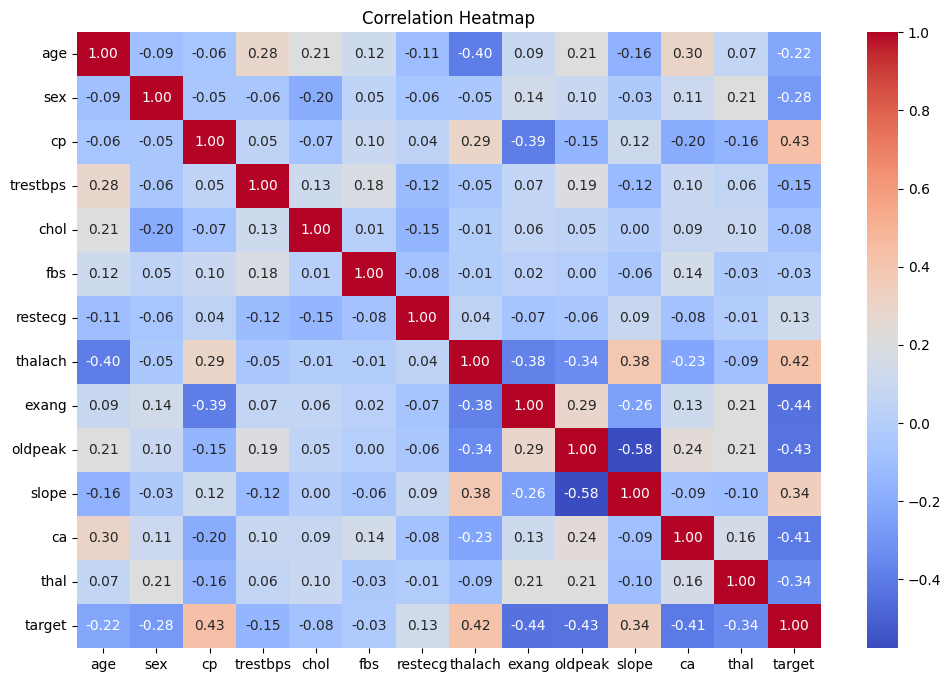

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Split & Scale data

In [8]:
X = df.drop('target', axis=1)
y = df['target']


In [9]:
# Scale features only (not the target)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression


In [11]:
log_reg_params = {
    "C": [0.01, 0.1, 1, 10, 100],        # Regularization strength
    "penalty": ["l1", "l2"],             # Type of penalty
    "solver": ["liblinear", "saga"]      # Solvers that support l1/l2
}

log_reg_grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid=log_reg_params,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)
log_reg_grid.fit(X_train, y_train)

print("Best Logistic Regression Params:", log_reg_grid.best_params_)
print("Best Logistic Regression ROC AUC:", log_reg_grid.best_score_)

Best Logistic Regression Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression ROC AUC: 0.904345037678371


In [29]:
log_reg_model = LogisticRegression(
    C=0.01,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    random_state=42
)
log_reg_model.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000, random_state=42, solver='liblinear')

In [30]:
# Train Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Predictions
y_train_pred = log_reg_model.predict(X_train)
y_test_pred = log_reg_model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", round(train_acc, 4))
print("Test Accuracy:", round(test_acc, 4))



Train Accuracy: 0.8589
Test Accuracy: 0.8197


In [31]:
print("Logistic Regression:")
print("F1 Score:", round(f1_score(y_test, y_test_pred), 4))
print("ROC AUC:", round(roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:,1]), 4))


Logistic Regression:
F1 Score: 0.8254
ROC AUC: 0.9267


#  Random forest

In [15]:
rf_params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)

print("Best Random Forest Params:", rf_grid.best_params_)
print("Best Random Forest ROC AUC:", rf_grid.best_score_)


Best Random Forest Params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Best Random Forest ROC AUC: 0.9184013517346852


In [16]:
rf_model = RandomForestClassifier(
    n_estimators=500,        # Number of trees
    max_depth=5,             # Limit tree depth
    min_samples_split=10,     # Minimum samples to split a node
    min_samples_leaf=4,      # Minimum samples in a leaf node
    max_features='sqrt',     # Limit features considered at each split
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=500, random_state=42)

In [17]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)


In [18]:
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest:")
print("Train Accuracy:", round(train_acc_rf, 4))
print("Test Accuracy:", round(test_acc_rf, 4))

Random Forest:
Train Accuracy: 0.9129
Test Accuracy: 0.8852


In [19]:
print("Random Forest:")
print("F1 Score:", round(f1_score(y_test, y_test_pred_rf), 4))
print("ROC AUC:", round(roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]), 4))

Random Forest:
F1 Score: 0.8923
ROC AUC: 0.945


# XGBoost

In [20]:
xgb_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 0.5],
    "reg_lambda": [0.5, 1, 2]
}

xgb_grid = GridSearchCV(
    XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss"
    ),
    param_grid=xgb_params,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)
xgb_grid.fit(X_train, y_train)

print("Best XGBoost Params:", xgb_grid.best_params_)
print("Best XGBoost ROC AUC:", xgb_grid.best_score_)

Best XGBoost Params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 0.5, 'subsample': 0.7}
Best XGBoost ROC AUC: 0.9200941034274367


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:18:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [32]:

xgb_model = XGBClassifier(
    n_estimators=200,         # More trees
    max_depth=4,              # Limit tree depth
    learning_rate=0.01,       # Slower learning
    subsample=0.7,            # Fraction of rows per tree
    colsample_bytree=0.7,     # Fraction of features per tree
    reg_alpha=0.1,            # L1 regularization
    reg_lambda=0.5,             # L2 regularization
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:25:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [33]:
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

In [34]:
train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)

print("XGBoost:")
print("Train Accuracy:", round(train_acc_xgb, 4))
print("Test Accuracy:", round(test_acc_xgb, 4))

XGBoost:
Train Accuracy: 0.9419
Test Accuracy: 0.8525


In [36]:
print("XGBoost:")
print("F1 Score:", round(f1_score(y_test, y_test_pred_xgb), 4))
print("ROC AUC:", round(roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]), 4))


XGBoost:
F1 Score: 0.8571
ROC AUC: 0.9418


# ROC Curves

<Figure size 800x600 with 0 Axes>

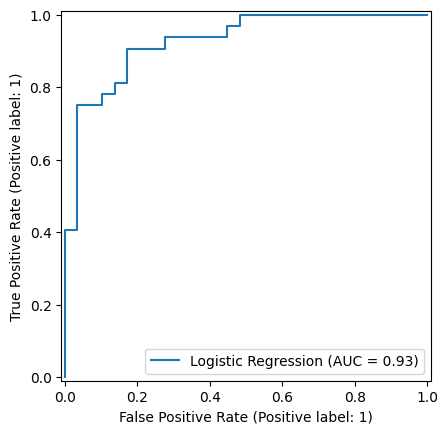

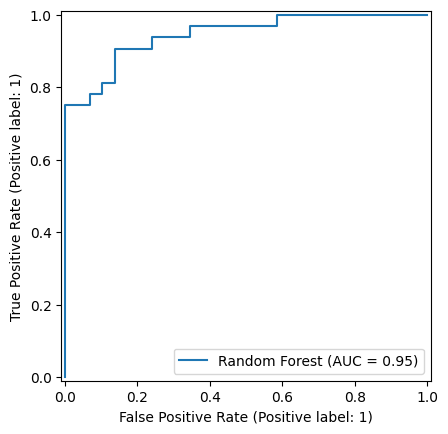

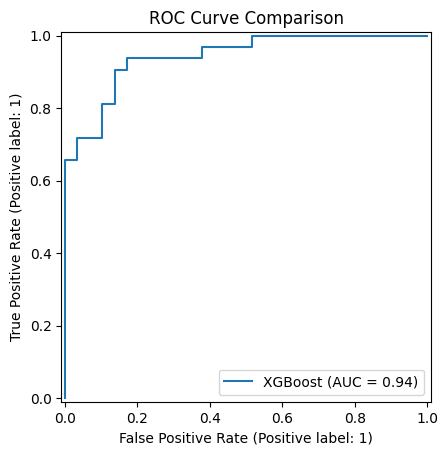

In [39]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8,6))

RocCurveDisplay.from_estimator(log_reg_model, X_test, y_test, name="Logistic Regression")
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name="Random Forest")
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test, name="XGBoost")

plt.title("ROC Curve Comparison")
plt.show()


# Summary Table

In [38]:

summary = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Train Accuracy": [train_acc, train_acc_rf, train_acc_xgb],
    "Test Accuracy": [test_acc, test_acc_rf, test_acc_xgb],
    "F1 Score": [f1_score(y_test, y_test_pred), f1_score(y_test, y_test_pred_rf), f1_score(y_test, y_test_pred_xgb)],
    "ROC AUC": [roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:,1]),
                roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]),
                roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])]
})

print(summary)


                 Model  Train Accuracy  Test Accuracy  F1 Score   ROC AUC
0  Logistic Regression        0.858921       0.819672  0.825397  0.926724
1        Random Forest        0.912863       0.885246  0.892308  0.945043
2              XGBoost        0.941909       0.852459  0.857143  0.941810


# Visualizations

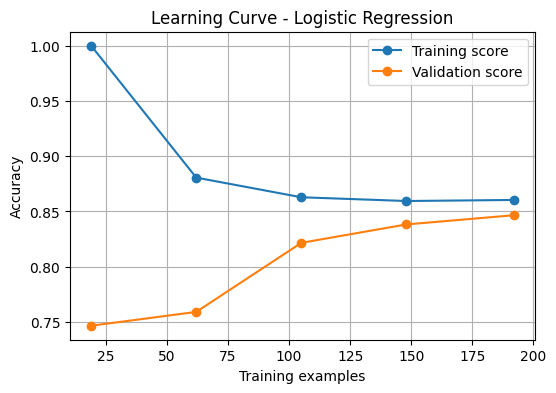

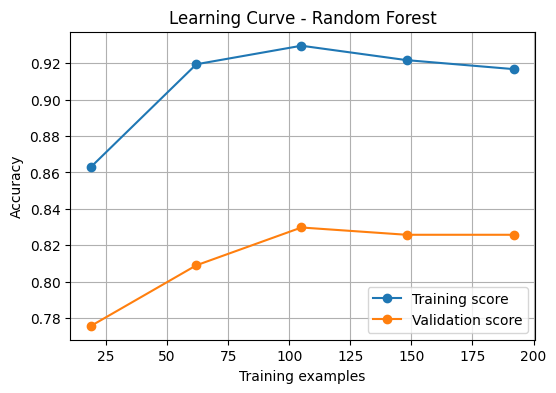

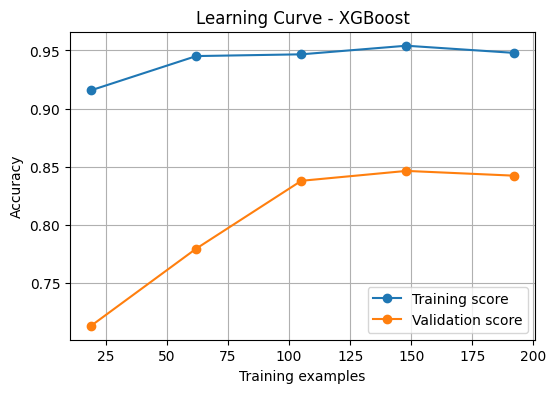

In [40]:


def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(6,4))
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Plot learning curves for each model
plot_learning_curve(log_reg_model, X_train, y_train, "Learning Curve - Logistic Regression")
plot_learning_curve(rf_model, X_train, y_train, "Learning Curve - Random Forest")
plot_learning_curve(xgb_model, X_train, y_train, "Learning Curve - XGBoost")


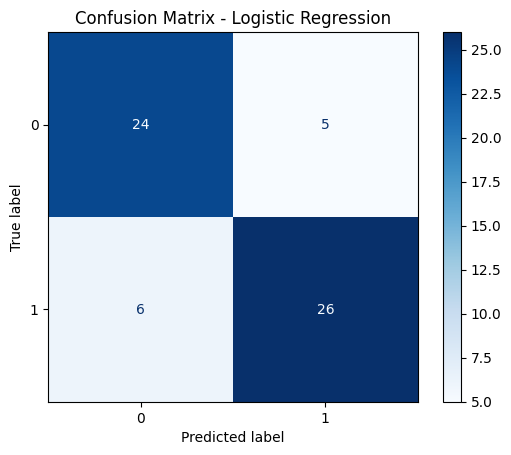

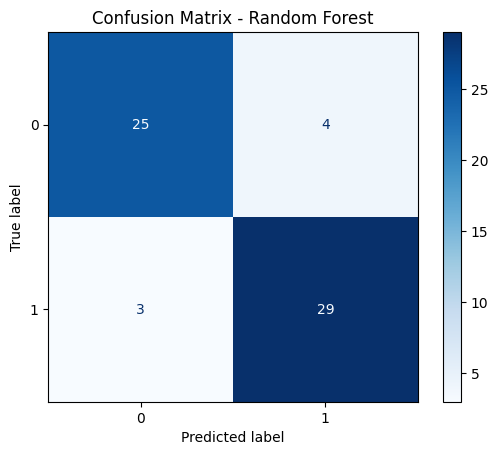

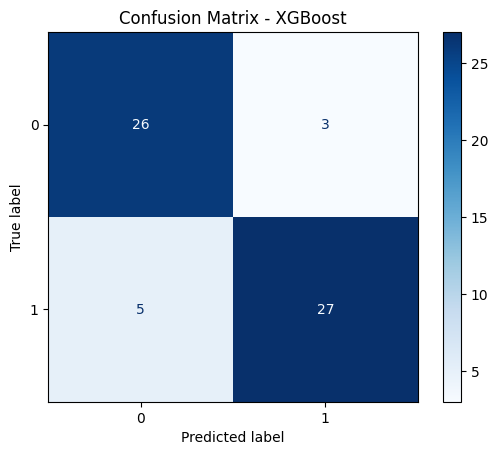

In [28]:


models = {
    "Logistic Regression": log_reg_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred,
        cmap="Blues",
        values_format="d"
    )
    disp.ax_.set_title(f"Confusion Matrix - {name}")
    plt.show()